<a href="https://colab.research.google.com/github/The23ird/The23ird/blob/main/Learnable_Task_9__Alikwe_Ortega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files


uploaded = files.upload()

import pandas as pd
import io



Saving tmdb_movies_data.csv to tmdb_movies_data (9).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_com

(None,
        id    imdb_id  popularity     budget     revenue  \
 0  135397  tt0369610   32.985763  150000000  1513528810   
 1   76341  tt1392190   28.419936  150000000   378436354   
 2  262500  tt2908446   13.112507  110000000   295238201   
 3  140607  tt2488496   11.173104  200000000  2068178225   
 4  168259  tt2820852    9.335014  190000000  1506249360   
 
                  original_title  \
 0                Jurassic World   
 1            Mad Max: Fury Road   
 2                     Insurgent   
 3  Star Wars: The Force Awakens   
 4                     Furious 7   
 
                                                 cast  \
 0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
 1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
 2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
 3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
 4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
 
                                             homepage          direct

In [17]:
import pandas as pd
import numpy as np
# Import NumPy

# To handle missing values, fill missing numeric values with median, categorical with 'Unknown'
df['genres'].fillna('Unknown', inplace=True)
df['runtime'].replace(0, np.nan, inplace=True)
 # Replace 0 runtimes with NaN
df['runtime'].fillna(df['runtime'].median(), inplace=True)
# Fill NaN with median

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Verify changes
df.info(), df[['runtime', 'release_date']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  float64       
 13  genres          

<ipython-input-17-d2b48cc876e6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].replace(0, np.nan, inplace=True)  # Replace 0 runtimes with NaN


(None,
    runtime release_date
 0    124.0   2015-06-09
 1    120.0   2015-05-13
 2    119.0   2015-03-18
 3    136.0   2015-12-15
 4    137.0   2015-04-01)

In [18]:
# 1. Calculate average runtime per genre
genre_runtimes = df.groupby('genres')['runtime'].mean().sort_values(ascending=False)

# 2. Find the movie with the longest runtime
longest_movie_idx = np.argmax(df['runtime'])
longest_movie = df.iloc[longest_movie_idx][['original_title', 'runtime', 'genres']]

# 3. Create a "Movie Age" column (assuming current year is 2025)
df['movie_age'] = 2025 - df['release_year']

# 4. Filter movies released between 2000 and 2010
movies_2000_2010 = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2010)]

# 5. Correlation between runtime and rating
runtime_rating_corr = df[['runtime', 'vote_average']].corr().iloc[0, 1]

genre_runtimes.head(), longest_movie, df[['original_title', 'movie_age']].head(), movies_2000_2010.shape[0], runtime_rating_corr


(genres
 War|Drama|Action|Adventure|History         540.0
 Adventure|Comedy|Family|Fantasy|Mystery    417.0
 Adventure|Drama|Fantasy|Horror             366.0
 Drama|History|Western                      343.0
 Crime|Drama|Thriller|History               338.0
 Name: runtime, dtype: float64,
 original_title    The Story of Film: An Odyssey
 runtime                                   900.0
 genres                              Documentary
 Name: 3894, dtype: object,
                  original_title  movie_age
 0                Jurassic World         10
 1            Mad Max: Fury Road         10
 2                     Insurgent         10
 3  Star Wars: The Force Awakens         10
 4                     Furious 7         10,
 4052,
 0.15471416085180403)

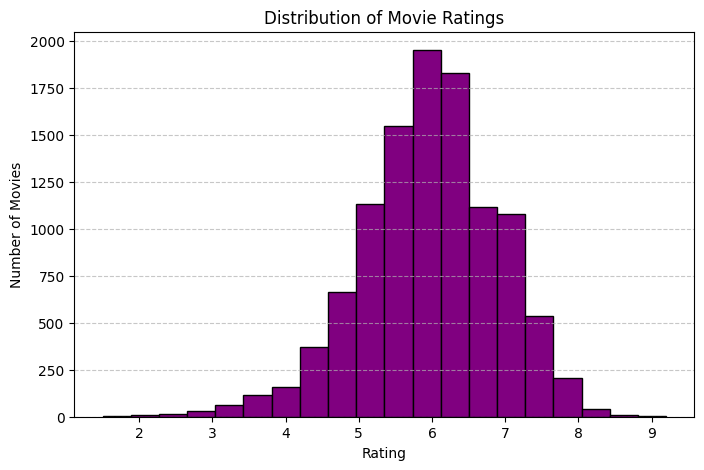

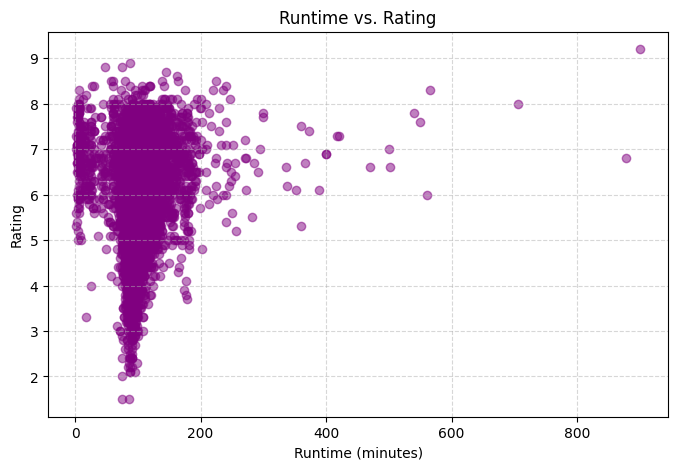

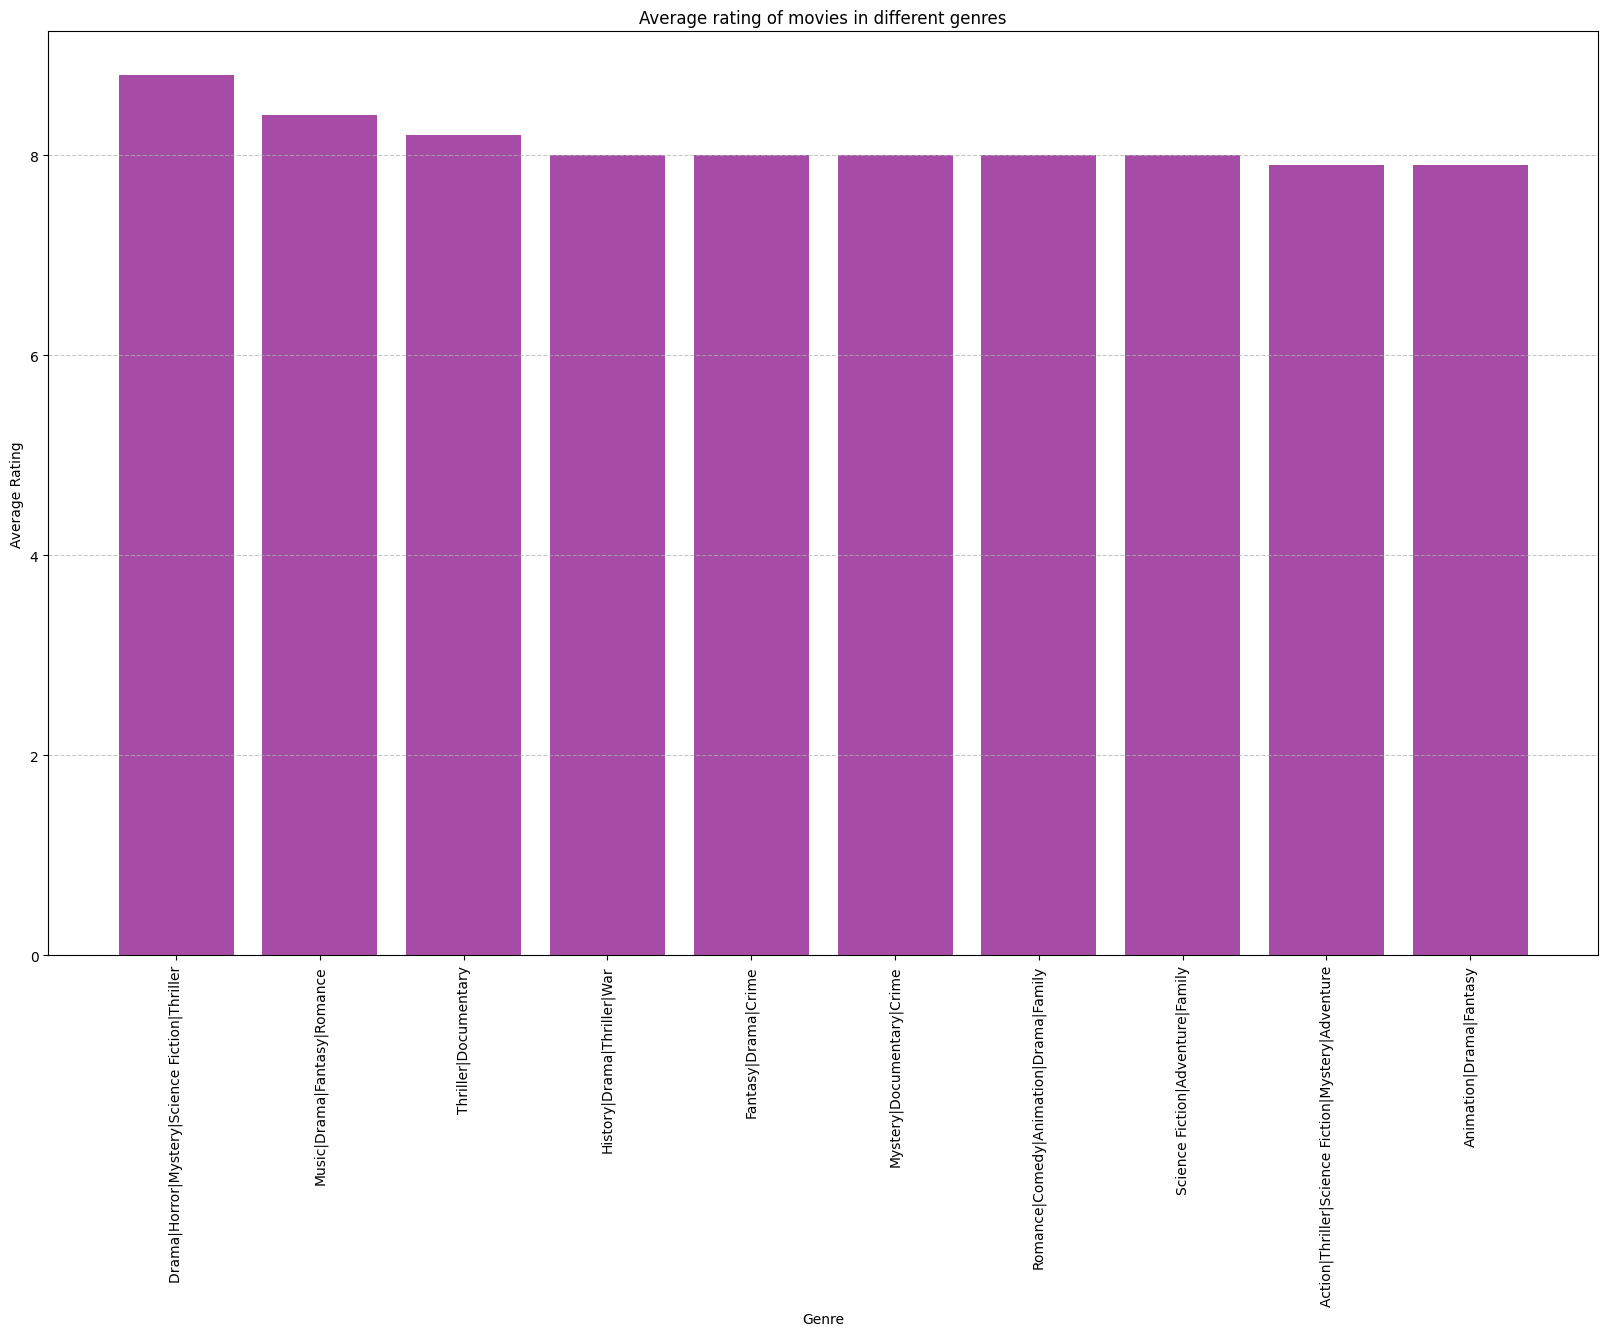

In [35]:
import matplotlib.pyplot as plt

#i. Create a histogram to visualise the distribution of movie ratings using plt.hist().
# 1. Histogram of movie ratings
plt.figure(figsize=(8, 5))
plt.hist(df['vote_average'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#ii. Generate a scatter plot to show the relationship between runtime and rating using plt.scatter().
# 2. Scatter plot: Runtime vs. Rating
plt.figure(figsize=(8, 5))
plt.scatter(df['runtime'], df['vote_average'], alpha=0.5, color='purple')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.title('Runtime vs. Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#iii. Create a bar chart to compare the average rating of movies in different genres using plt.bar().
# 3. Bar chart: Average Rating by Genre (Top 10 genres)
genre_avg_rating = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(20, 12))
plt.bar(genre_avg_rating.index, genre_avg_rating.values, color='purple', alpha=0.7)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in different genres')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#3. Data Visualization:
#a. Use Matplotlib to create visualisations that highlight interesting patterns or insights from the data.
#b. Add titles, labels, and legends to make your visualisations informative.


In [40]:
print(df.columns)


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'movie_age'],
      dtype='object')


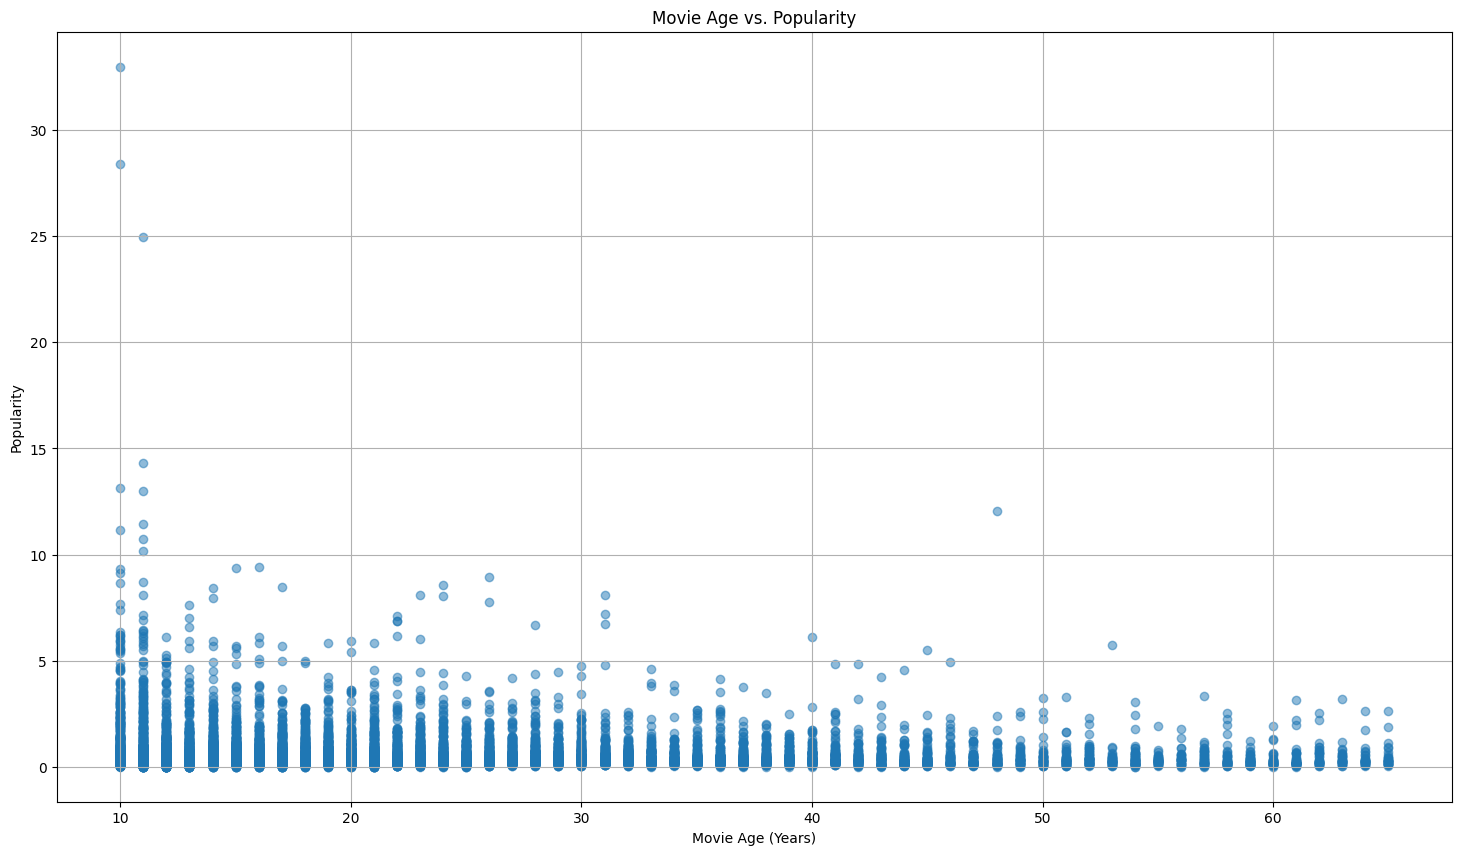

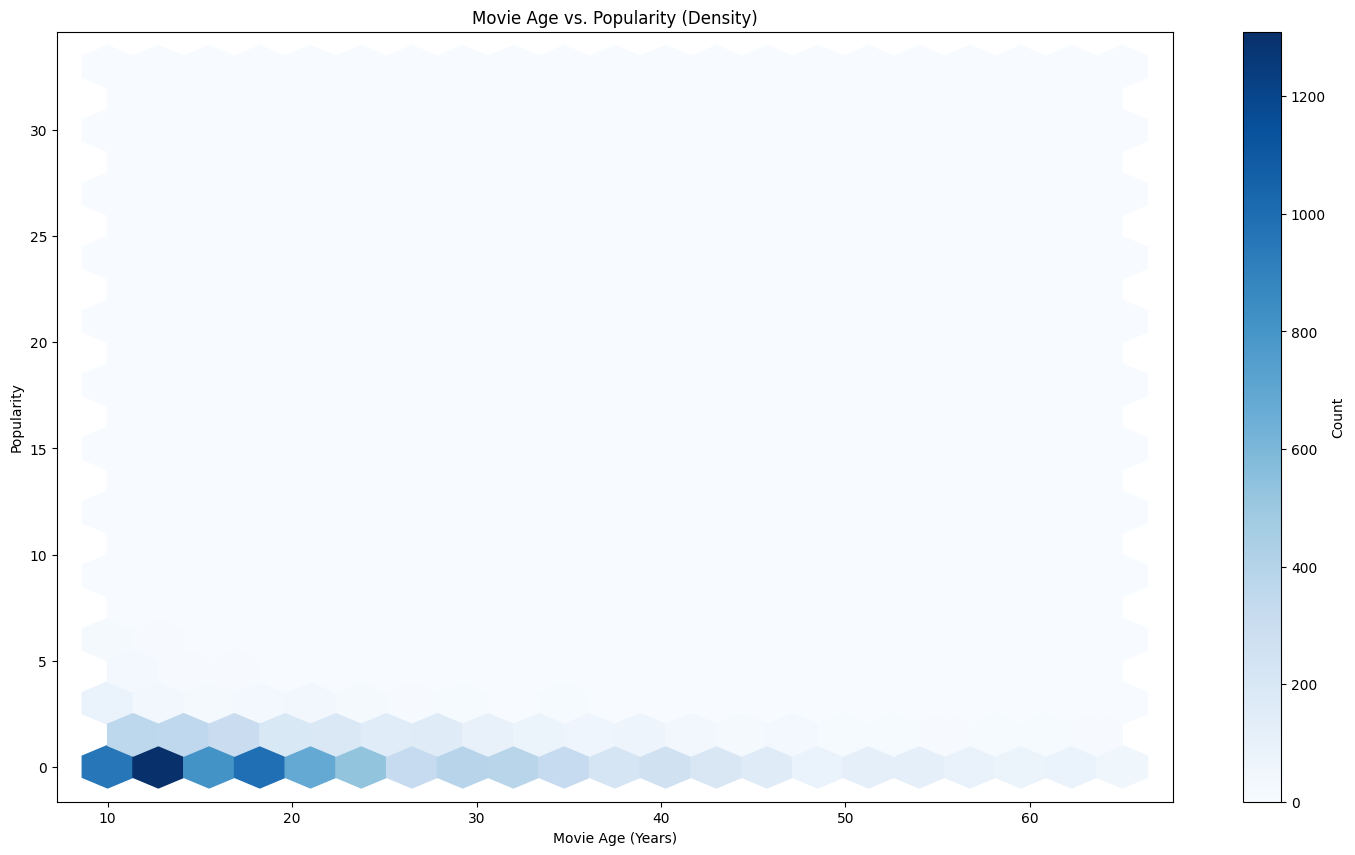

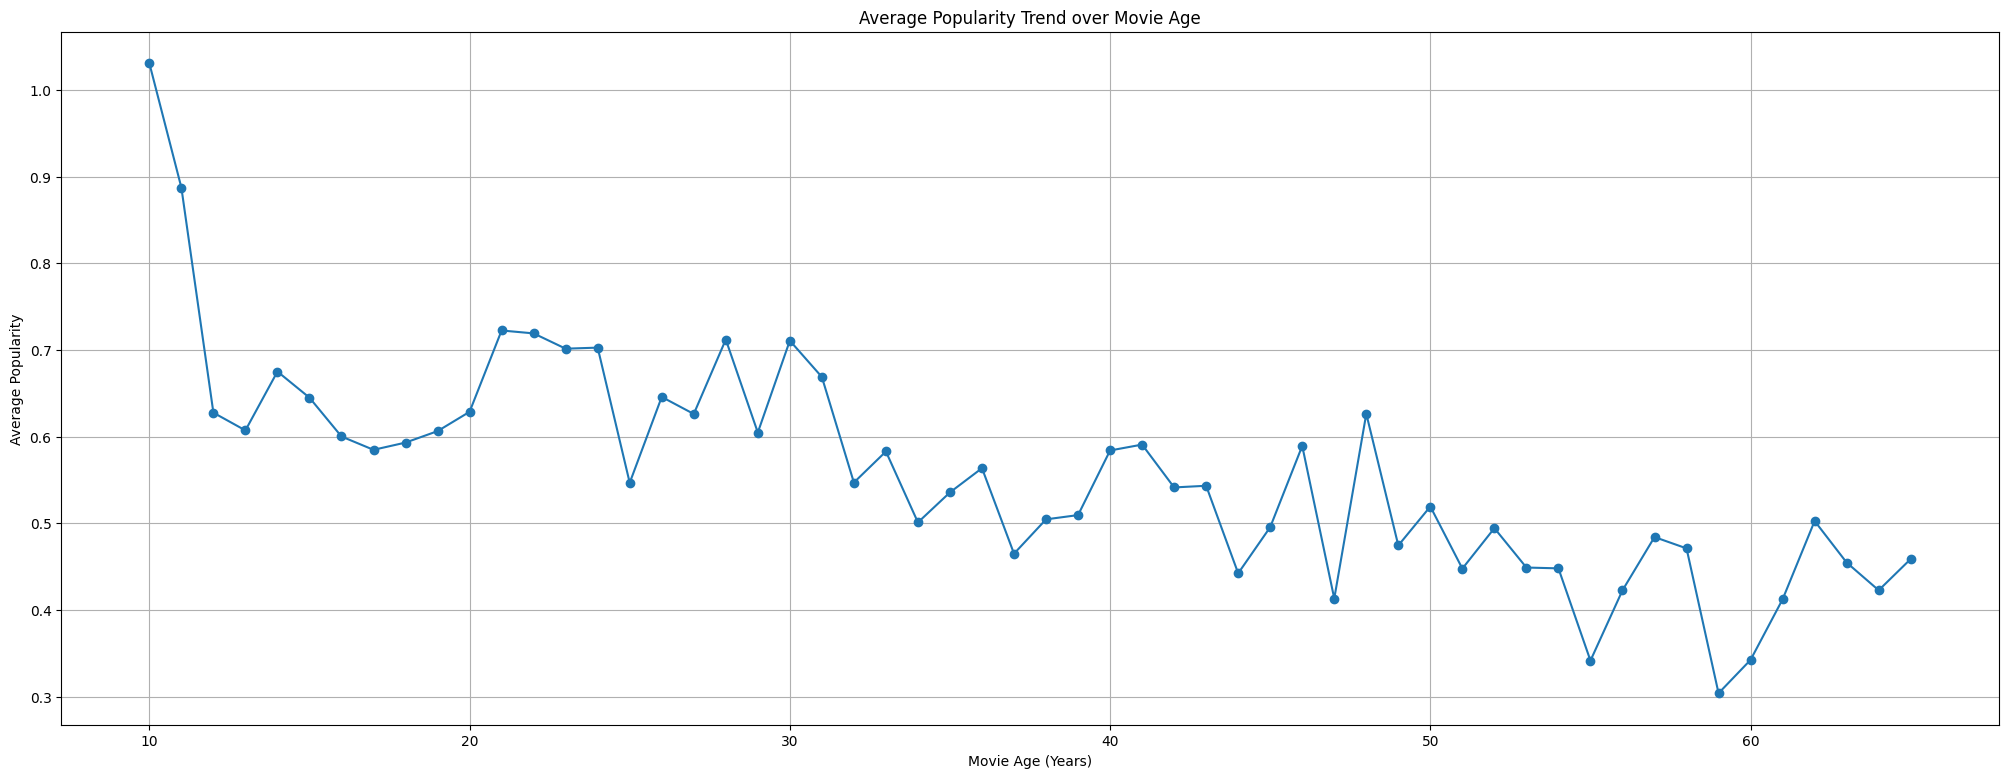

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Having calculated 'movie_age' as 2025 - release_year

# 1. Scatter Plot: Movie Age vs. Popularity
plt.figure(figsize=(18, 10))
plt.scatter(df['movie_age'], df['popularity'], alpha=0.5)
plt.title('Movie Age vs. Popularity')
plt.xlabel('Movie Age (Years)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# 2. Hexbin Plot: Movie Age vs. Popularity (for Density)
plt.figure(figsize=(18, 10))
plt.hexbin(df['movie_age'], df['popularity'], gridsize=20, cmap='Blues')
plt.title('Movie Age vs. Popularity (Density)')
plt.xlabel('Movie Age (Years)')
plt.ylabel('Popularity')
plt.colorbar(label='Count')
plt.show()

# 3. Line Plot: Average Popularity Trend over Movie Age
avg_popularity_by_age = df.groupby('movie_age')['popularity'].mean()
plt.figure(figsize=(25, 9))
plt.plot(avg_popularity_by_age.index, avg_popularity_by_age.values, marker='o', linestyle='-')
plt.title('Average Popularity Trend over Movie Age')
plt.xlabel('Movie Age (Years)')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()


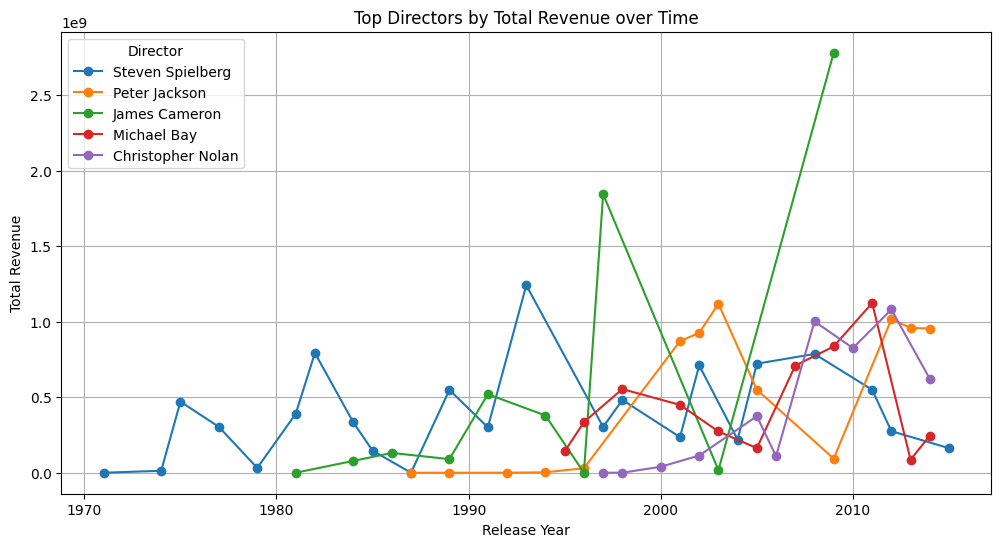

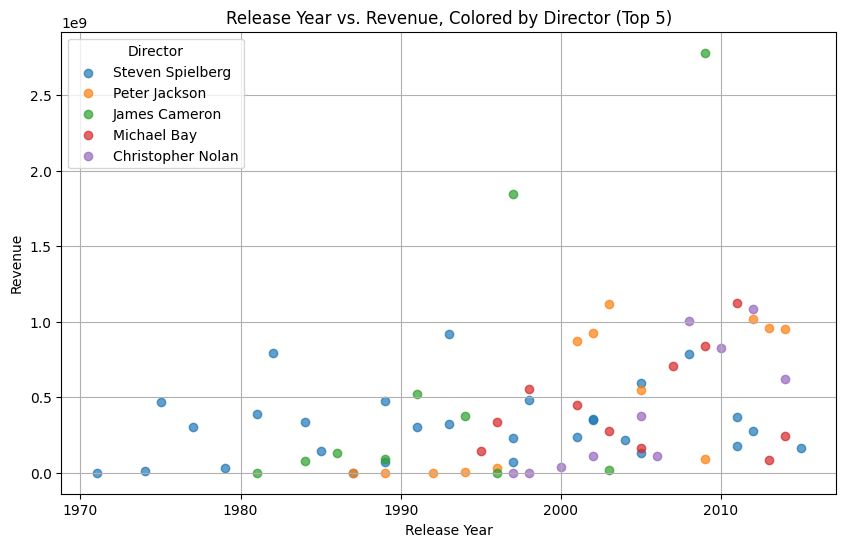

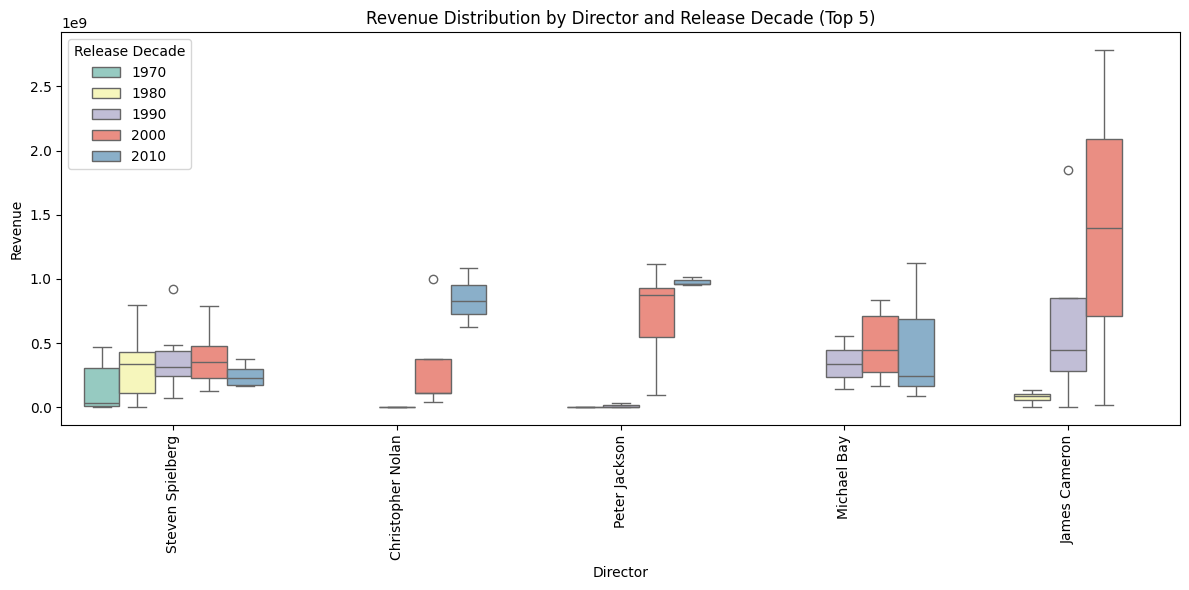

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Top Directors by Total Revenue over Time
# Group by director and release year, summing revenue
director_revenue_by_year = df.groupby(['director', 'release_year'])['revenue'].sum().reset_index()

# Select top 5 directors by total revenue
top_directors = director_revenue_by_year.groupby('director')['revenue'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 6))
# Plot revenue trend for top directors over time
for director in top_directors:
    director_data = director_revenue_by_year[director_revenue_by_year['director'] == director]
    plt.plot(director_data['release_year'], director_data['revenue'], label=director, marker='o')

plt.title('Top Directors by Total Revenue over Time')
plt.xlabel('Release Year')
plt.ylabel('Total Revenue')
plt.legend(title='Director')
plt.grid(True)
plt.show()

# 2. Scatter Plot: Release Year vs. Revenue, Colored by Director (Top 5)
plt.figure(figsize=(10, 6))
# Plot release year vs. revenue for top directors
for director in top_directors:
    director_data = df[df['director'] == director]
    plt.scatter(director_data['release_year'], director_data['revenue'], label=director, alpha=0.7)

plt.title('Release Year vs. Revenue, Colored by Director (Top 5)')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.legend(title='Director')
plt.grid(True)
plt.show()

# 3. Box Plot: Revenue Distribution by Director (Top 5), Grouped by Release Year Decades
# Create release year decade groups
df['release_decade'] = (df['release_year'] // 10) * 10

plt.figure(figsize=(12, 6))
# Plot revenue distribution for top directors, grouped by release decades
sns.boxplot(x='director', y='revenue', hue='release_decade',
            data=df[df['director'].isin(top_directors)], palette='Set3')
plt.title('Revenue Distribution by Director and Release Decade (Top 5)')
plt.xlabel('Director')
plt.ylabel('Revenue')
plt.xticks(rotation=90, ha='center')
plt.legend(title='Release Decade')
plt.tight_layout()
plt.show()

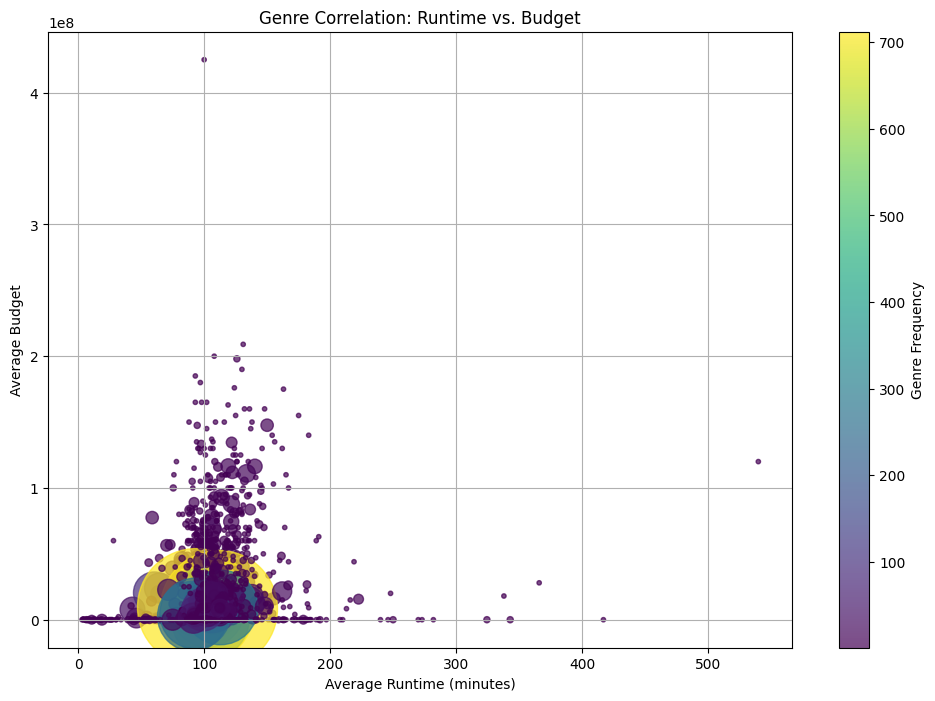

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Group by Genre and Calculate Average Runtime and Budget
genre_stats = df.groupby('genres')[['runtime', 'budget']].mean().reset_index()

# 2. Visualize with Bubble Chart
plt.figure(figsize=(12, 8))
# Plot average runtime vs. average budget, with bubble size representing genre frequency
# Scale budget and runtime for better visualization
x = genre_stats['runtime']
y = genre_stats['budget']
z = df['genres'].value_counts()[genre_stats['genres']].values  # Bubble size based on genre frequency
plt.scatter(x, y, s=z*10, alpha=0.7, c=z, cmap='viridis')  # Color bubbles based on frequency

plt.title('Genre Correlation: Runtime vs. Budget')
plt.xlabel('Average Runtime (minutes)')
plt.ylabel('Average Budget')
plt.colorbar(label='Genre Frequency')

plt.grid(True)
plt.show()